In [1]:
from analysis_utils import get_combined_data
usd_name = 'BUSD'
token_name='BTC'
symbol = token_name + usd_name

df_data = get_combined_data(symbol, 'default', 1652229060000, 1658229059999)

In [2]:
import pandas as pd
import numpy as np

df = df_data.copy()
# df[10000:].head(10)
steps = [1, 2, 3, 5, 7, 30]
# steps = [1]

buy_idx = df[pd.isna(df['buy_price'].shift(1)) & (~pd.isna(df['buy_price']))].index
sell_idx = df[pd.isna(df['sell_price'].shift(1)) & (~pd.isna(df['sell_price']))].index
for step in steps:
    df['close_after_{}'.format(step)] = df['close'].shift(-step)
    df['earn_after_{}'.format(step)] = (df['close'].shift(-step) - df['close']) / df['close']

df.head(10)
# df.loc[buy_idx, :].head(10)

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,...,close_after_2,earn_after_2,close_after_3,earn_after_3,close_after_5,earn_after_5,close_after_7,earn_after_7,close_after_30,earn_after_30
0,1.652229e+12,31144.3,31165.8,31120.6,31164.2,30.906,1.652229e+12,9.624098e+05,501.0,18.305,...,31115.6,-0.001559,31125.0,-0.001258,31166.2,0.000064,31126.9,-0.001197,31003.8,-0.005147
1,1.652229e+12,31164.2,31180.0,31130.4,31146.7,27.177,1.652229e+12,8.468196e+05,427.0,10.484,...,31125.0,-0.000697,31143.8,-0.000093,31113.0,-0.001082,31093.8,-0.001698,31038.4,-0.003477
2,1.652229e+12,31140.6,31140.6,31100.0,31115.6,28.883,1.652229e+12,8.986365e+05,500.0,13.884,...,31143.8,0.000906,31166.2,0.001626,31126.9,0.000363,31085.3,-0.000974,31036.3,-0.002549
3,1.652229e+12,31115.6,31154.9,31112.3,31125.0,19.850,1.652229e+12,6.179290e+05,398.0,9.091,...,31166.2,0.001324,31113.0,-0.000386,31093.8,-0.001002,31134.6,0.000308,31036.4,-0.002847
4,1.652229e+12,31123.2,31148.8,31117.9,31143.8,17.293,1.652229e+12,5.383497e+05,240.0,9.574,...,31113.0,-0.000989,31126.9,-0.000543,31085.3,-0.001878,31130.2,-0.000437,31052.7,-0.002925
5,1.652229e+12,31143.8,31173.2,31140.1,31166.2,28.494,1.652229e+12,8.879296e+05,405.0,14.910,...,31126.9,-0.001261,31093.8,-0.002323,31134.6,-0.001014,31206.9,0.001306,31024.3,-0.004553
6,1.652229e+12,31161.7,31178.0,31097.8,31113.0,31.265,1.652229e+12,9.733273e+05,501.0,15.006,...,31093.8,-0.000617,31085.3,-0.000890,31130.2,0.000553,31186.0,0.002346,30989.0,-0.003985
7,1.652229e+12,31113.7,31149.9,31103.6,31126.9,25.903,1.652230e+12,8.063249e+05,387.0,12.571,...,31085.3,-0.001336,31134.6,0.000247,31206.9,0.002570,31137.2,0.000331,30930.7,-0.006303
8,1.652230e+12,31126.8,31133.1,31093.6,31093.8,19.994,1.652230e+12,6.220328e+05,363.0,8.712,...,31134.6,0.001312,31130.2,0.001171,31186.0,0.002965,31105.1,0.000363,30930.2,-0.005261
9,1.652230e+12,31094.4,31096.6,31058.2,31085.3,44.620,1.652230e+12,1.386531e+06,611.0,24.789,...,31130.2,0.001444,31206.9,0.003912,31137.2,0.001670,31080.3,-0.000161,30947.6,-0.004430


In [4]:
# buy_idx
df_data.iloc[140:, :].head(20)

,open_time,open,high,low,close,volume,close_time,quote_assert_volume,number_of_trades,taker_buy_volume,taker_buy_quote_asset_volume,TR,last_top,step_after_top,last_bottom,step_after_bottom,is_up,cycle_step,buy_price,sell_price
140,1.652237e+12,31232.4,31275.4,31232.4,31260.9,23.426,1.652238e+12,7.324092e+05,403.0,13.263,4.146198e+05,43.0,NaN,NaN,30609.3,47.0,0.0,NaN,NaN,NaN
141,1.652238e+12,31260.9,31358.7,31260.9,31337.5,82.426,1.652238e+12,2.581683e+06,976.0,45.945,1.439082e+06,97.8,NaN,NaN,30609.3,48.0,0.0,NaN,NaN,NaN
142,1.652238e+12,31337.3,31432.5,31336.4,31420.5,99.331,1.652238e+12,3.117375e+06,1155.0,61.204,1.920574e+06,96.1,NaN,NaN,30609.3,49.0,0.0,NaN,NaN,NaN
143,1.652238e+12,31420.5,31481.2,31404.6,31404.7,74.752,1.652238e+12,2.350134e+06,908.0,26.846,8.442768e+05,76.6,NaN,NaN,30609.3,50.0,0.0,NaN,NaN,NaN
144,1.652238e+12,31404.7,31409.2,31376.1,31377.5,36.655,1.652238e+12,1.150729e+06,483.0,21.813,6.847119e+05,33.1,NaN,NaN,30609.3,51.0,0.0,NaN,NaN,NaN
145,1.652238e+12,31377.5,31398.2,31372.1,31377.8,24.468,1.652238e+12,7.679056e+05,251.0,11.424,3.584837e+05,26.1,NaN,NaN,30609.3,52.0,0.0,NaN,NaN,NaN
146,1.652238e+12,31377.9,31446.1,31377.9,31428.9,43.885,1.652238e+12,1.378304e+06,549.0,26.934,8.459811e+05,68.2,31518.9,30.0,30609.3,53.0,0.0,23.0,NaN,NaN
147,1.652238e+12,31431.6,31500.0,31425.8,31479.3,66.478,1.652238e+12,2.092302e+06,886.0,34.762,1.093841e+06,74.2,31518.9,31.0,30609.3,54.0,0.0,23.0,NaN,NaN
148,1.652238e+12,31479.3,31505.5,31442.1,31448.4,39.227,1.652238e+12,1.234824e+06,505.0,23.434,7.377659e+05,63.4,31518.9,32.0,30609.3,55.0,0.0,23.0,NaN,NaN
149,1.652238e+12,31454.6,31459.8,31420.4,31431.6,29.322,1.652238e+12,9.218900e+05,468.0,12.974,4.078624e+05,39.4,31518.9,33.0,30609.3,56.0,0.0,23.0,NaN,NaN


In [5]:
print('Buy:')
for step in steps:
    print('Earn after {} steps :'.format(step), df.loc[buy_idx, 'earn_after_{}'.format(step)].mean() * 100, "%")

print('Sell:')
for step in steps:
    print('Earn after {} steps :'.format(step), df.loc[sell_idx, 'earn_after_{}'.format(step)].mean() * 100, "%")

Buy:
Earn after 1 steps : 0.006343278232796951 %
Earn after 2 steps : 0.00022374586853725546 %
Earn after 3 steps : -0.0023151973264081437 %
Earn after 5 steps : 0.0013891426662243583 %
Earn after 7 steps : -0.01925573851089184 %
Earn after 30 steps : -0.008275264367680994 %
Sell:
Earn after 1 steps : -0.016384256004896125 %
Earn after 2 steps : -0.016616627145242667 %
Earn after 3 steps : -0.02129386393275894 %
Earn after 5 steps : -0.02787309097434775 %
Earn after 7 steps : -0.01927371246302194 %
Earn after 30 steps : -0.0719589243728277 %


e:\python_env\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
e:\python_env\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


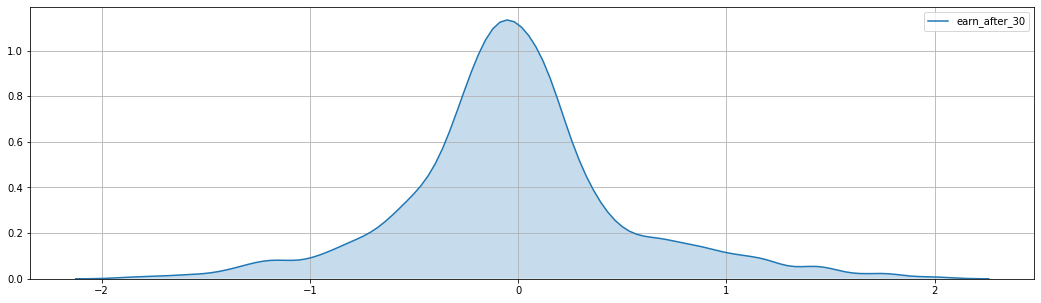

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (18, 5) } )

def plt_hist(data, name, bias=0):
    # cut_name = name + '_cut'
    # data[cut_name] = pd.qcut(data[name], 50, duplicates='drop')
    plt.figure(figsize=(18,5))
    # (data.groupby(cut_name)[name].mean() - bias).plot.bar()
    # plt.title(name)
    # plt.show()
    plt.grid()
    # plt.hist(data[name], bins=50)
    sns.kdeplot(data[name]*100, shade=True, clip=(-2, 2))

plt_hist(df.loc[buy_idx], 'earn_after_30')

In [59]:
(df.loc[buy_idx, 'earn_after_1'] > 0).sum()
(df.loc[buy_idx, 'earn_after_1'] < 0).sum()
len(df.loc[buy_idx, 'earn_after_1'])

1695